In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scienceplots

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.style.use('default')
plt.rcParams.update({'font.size':15})

# Question 1

In [3]:
def f1(x,y):
    return -4*(np.pi**2)*y
def f2(x,y):
    f = np.array([y[1],-4*np.pi**2*y[0]])
    return f

In [4]:
def euler(y,x,h,f=f1):
    yn = y +f(x,y)*h
    return yn
def rk4(y,x,h,f):
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    y_n = y + (k1+2*k2+2*k3+k4)/6

    return y_n

def vlt(yn, ym1, xn, h , f):
    yn = 2*yn - ym1 + f(xn, yn)*h**2
    return yn

def vel_vlt(yn, vn, x, h , f):
    ynp1 = yn + vn*h + 0.5*f(x, yn)*(h**2)
    vnp1 = vn + 0.5*(f(x, yn) + f(x + h, ynp1))*h
    return ynp1, vnp1


In [5]:
def call(meth,a,b,N,y0,f=f1): # call function Discretizes and generates method
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    y,ys[0] = y0,y0
    xs = np.arange(a,b+h/2,h)
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        y = meth(y,xs[i],h,f)
    return ys

def call_verlet(a,b,N,y0, v0,f=f1):
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    xs = np.arange(a,b+h/2,h)

    ys[0] = y0

    x0 = xs[0]

    ys[1] = y0 + v0*h + 0.5*f(x0, y0)*(h**2)
    
    y = ys[1]
    for i in range(1,N):
        ys[i,:] = y # to allow for vector solutions
        y = vlt(ys[i], ys[i-1],xs[i],h,f)
    return ys

def call_vvlt(meth,a,b,N,y0,v0, f=f1):
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    xs = np.arange(a,b+h/2,h)
    vs = np.zeros((N, len(v0)))
    y,ys[0] = y0,y0
    x0 = xs[0]
    v,vs[0] = v0,v0
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        vs[i,:] = v
        [y,v] = meth(ys[i], vs[i],xs[i],h,f)
    return ys, vs

In [6]:
a = 0 # t_initial 
b = 15# t final
h = 0.01# step size
N = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y0 = np.array([1.0])
y_ini = np.asarray([1.0, 0.0])  # Initial condition
v0 = np.array([0.0])

In [7]:
# y_vvlt = call(euler,a,b,N,y0)
y_vlt = call_verlet(a,b,N,y0,v0)
y_rk4 = call(rk4,a,b,N,y_ini, f=f2)
[y_vvlt, p_vvlt] = call_vvlt(vel_vlt,a,b,N,y0,v0)
y_ex = np.cos(2*np.pi*xval)

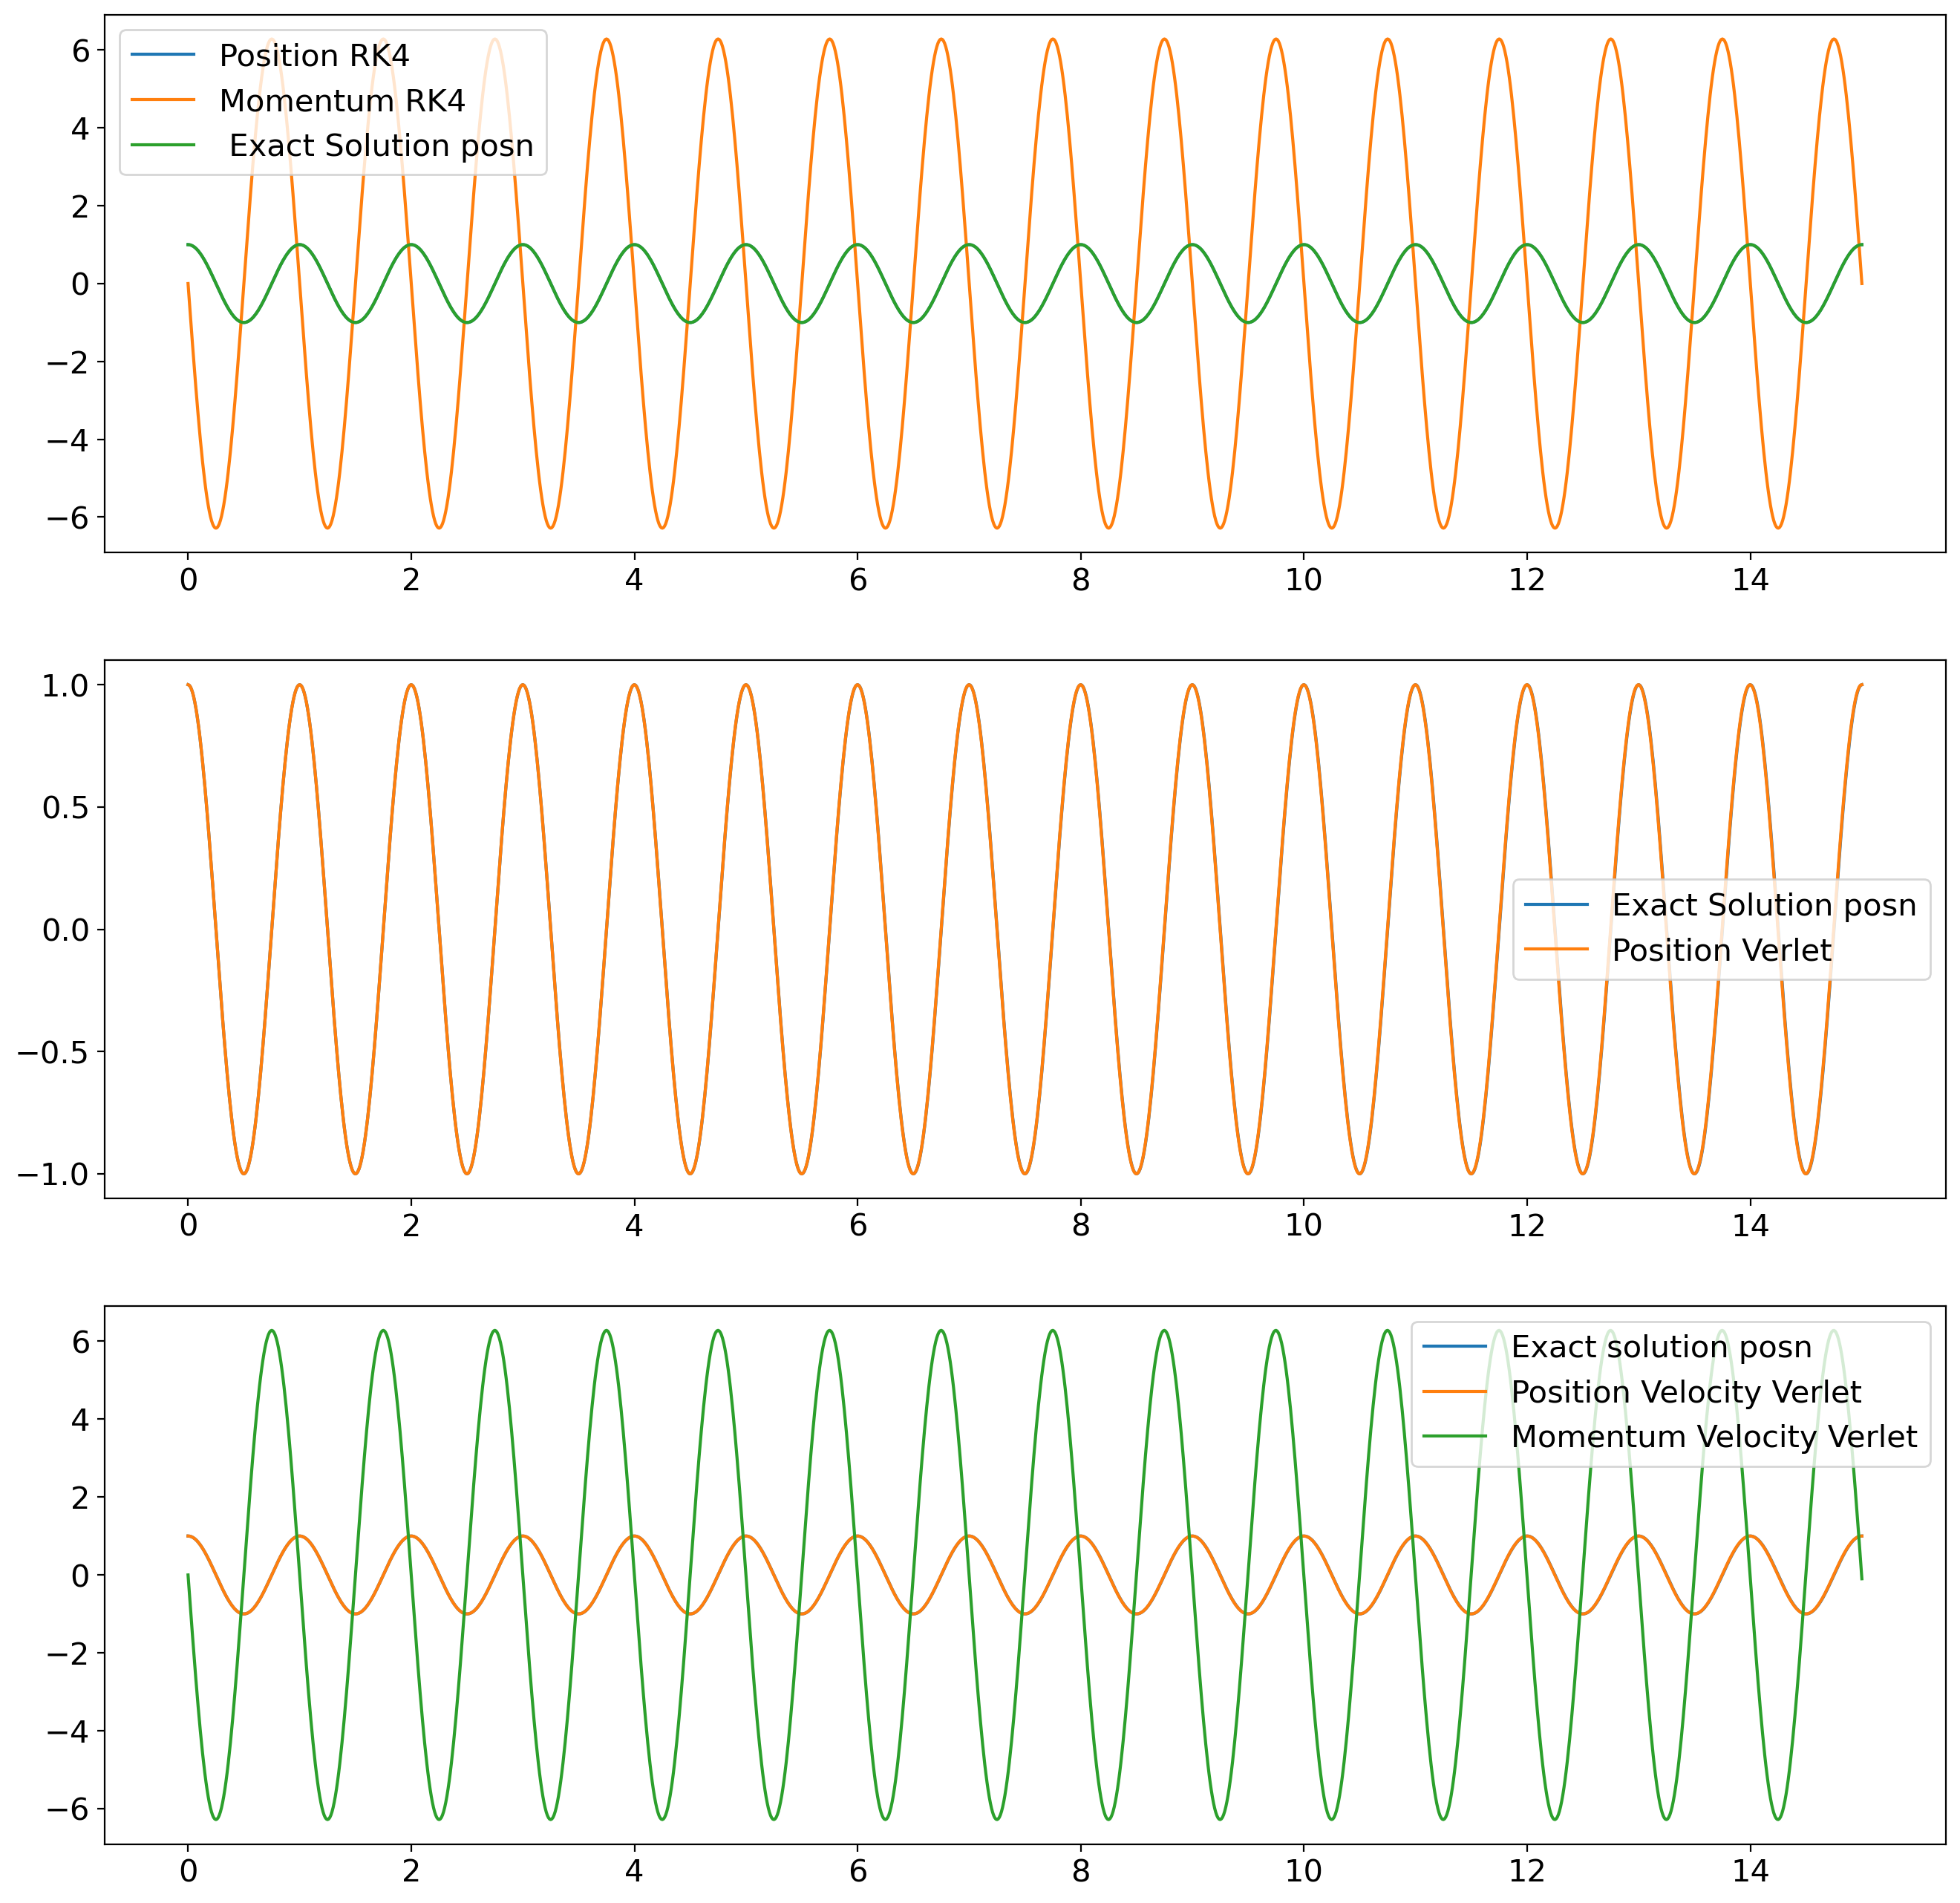

In [8]:
# plt.plot(xval, y_rk4[:,1])
fig,axes = plt.subplots(3,1, figsize=(16,16), dpi =200)
axes[0].plot(xval, y_rk4[:,0], label = "Position RK4")
axes[0].plot(xval, y_rk4[:,1], label = "Momentum RK4")

axes[0].plot(xval, y_ex, label = " Exact Solution posn")
axes[1].plot(xval, y_ex, label = "Exact Solution posn")
axes[2].plot(xval, y_ex, label = "Exact solution posn")
axes[1].plot(xval, y_vlt, label = "Position Verlet")
axes[2].plot(xval, y_vvlt, label = "Position Velocity Verlet")
axes[2].plot(xval, p_vvlt, label = "Momentum Velocity Verlet")

for ax in fig.get_axes():
    ax.legend()

In [20]:
n = np.arange(-4,-1.99,0.2)
h = 10**n

Narr = np.asarray(1+ (b-a)/h, dtype=int)
y_err_rk4 = np.zeros(len(n))
y_err_vlt = np.zeros(len(n))
y_err_vvlt = np.zeros(len(n))

for i in range(0, len(n)):
    ysvvlt = call_vvlt(vel_vlt,a,b,Narr[i], y0, v0, f1)[0]
    ysvlt = call_verlet(a,b,Narr[i],y0, v0, f1)
    ysrk4 = call(rk4, a,b,Narr[i],y_ini,f=f2)
    
    fyvvlt = ysvvlt[-1]
  
    fyvlt = ysvlt[-1]
    fyr = ysrk4[-1,0]
    comp = np.cos(2*np.pi*b)
    y_err_vvlt[i]= abs(fyvvlt - comp)
    y_err_vlt[i] = abs(fyvlt - comp)
    y_err_rk4[i] = abs(fyr - comp)

/tmp/ipykernel_30859/3405157178.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_err_vvlt[i]= abs(fyvvlt - comp)
/tmp/ipykernel_30859/3405157178.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_err_vlt[i] = abs(fyvlt - comp)


In [21]:
def linfit(x,a,b):# linear fit function
    y = a*x+b
    return y

yrk4p, pcovrk4 = curve_fit(linfit, np.log10(h)[3:], np.log10(y_err_rk4)[3:])
yvp, pcovv = curve_fit(linfit, np.log10(h)[1:], np.log10(y_err_vlt)[1:])
yvvp, pcovvv = curve_fit(linfit, np.log10(h), np.log10(y_err_vvlt))
yrk4p, yvp, yvvp # the first argument of the array gives us the slope

(array([4.96882279, 3.73248313]),
 array([3.97348095, 4.01291207]),
 array([3.99849687, 4.07639045]))

In [11]:
errx = np.linspace(n[0],n[-1],500)
yvfit = linfit(errx, *yvp)
yvvfit = linfit(errx, *yvvp)
yrk4fit = linfit(errx, *yrk4p)

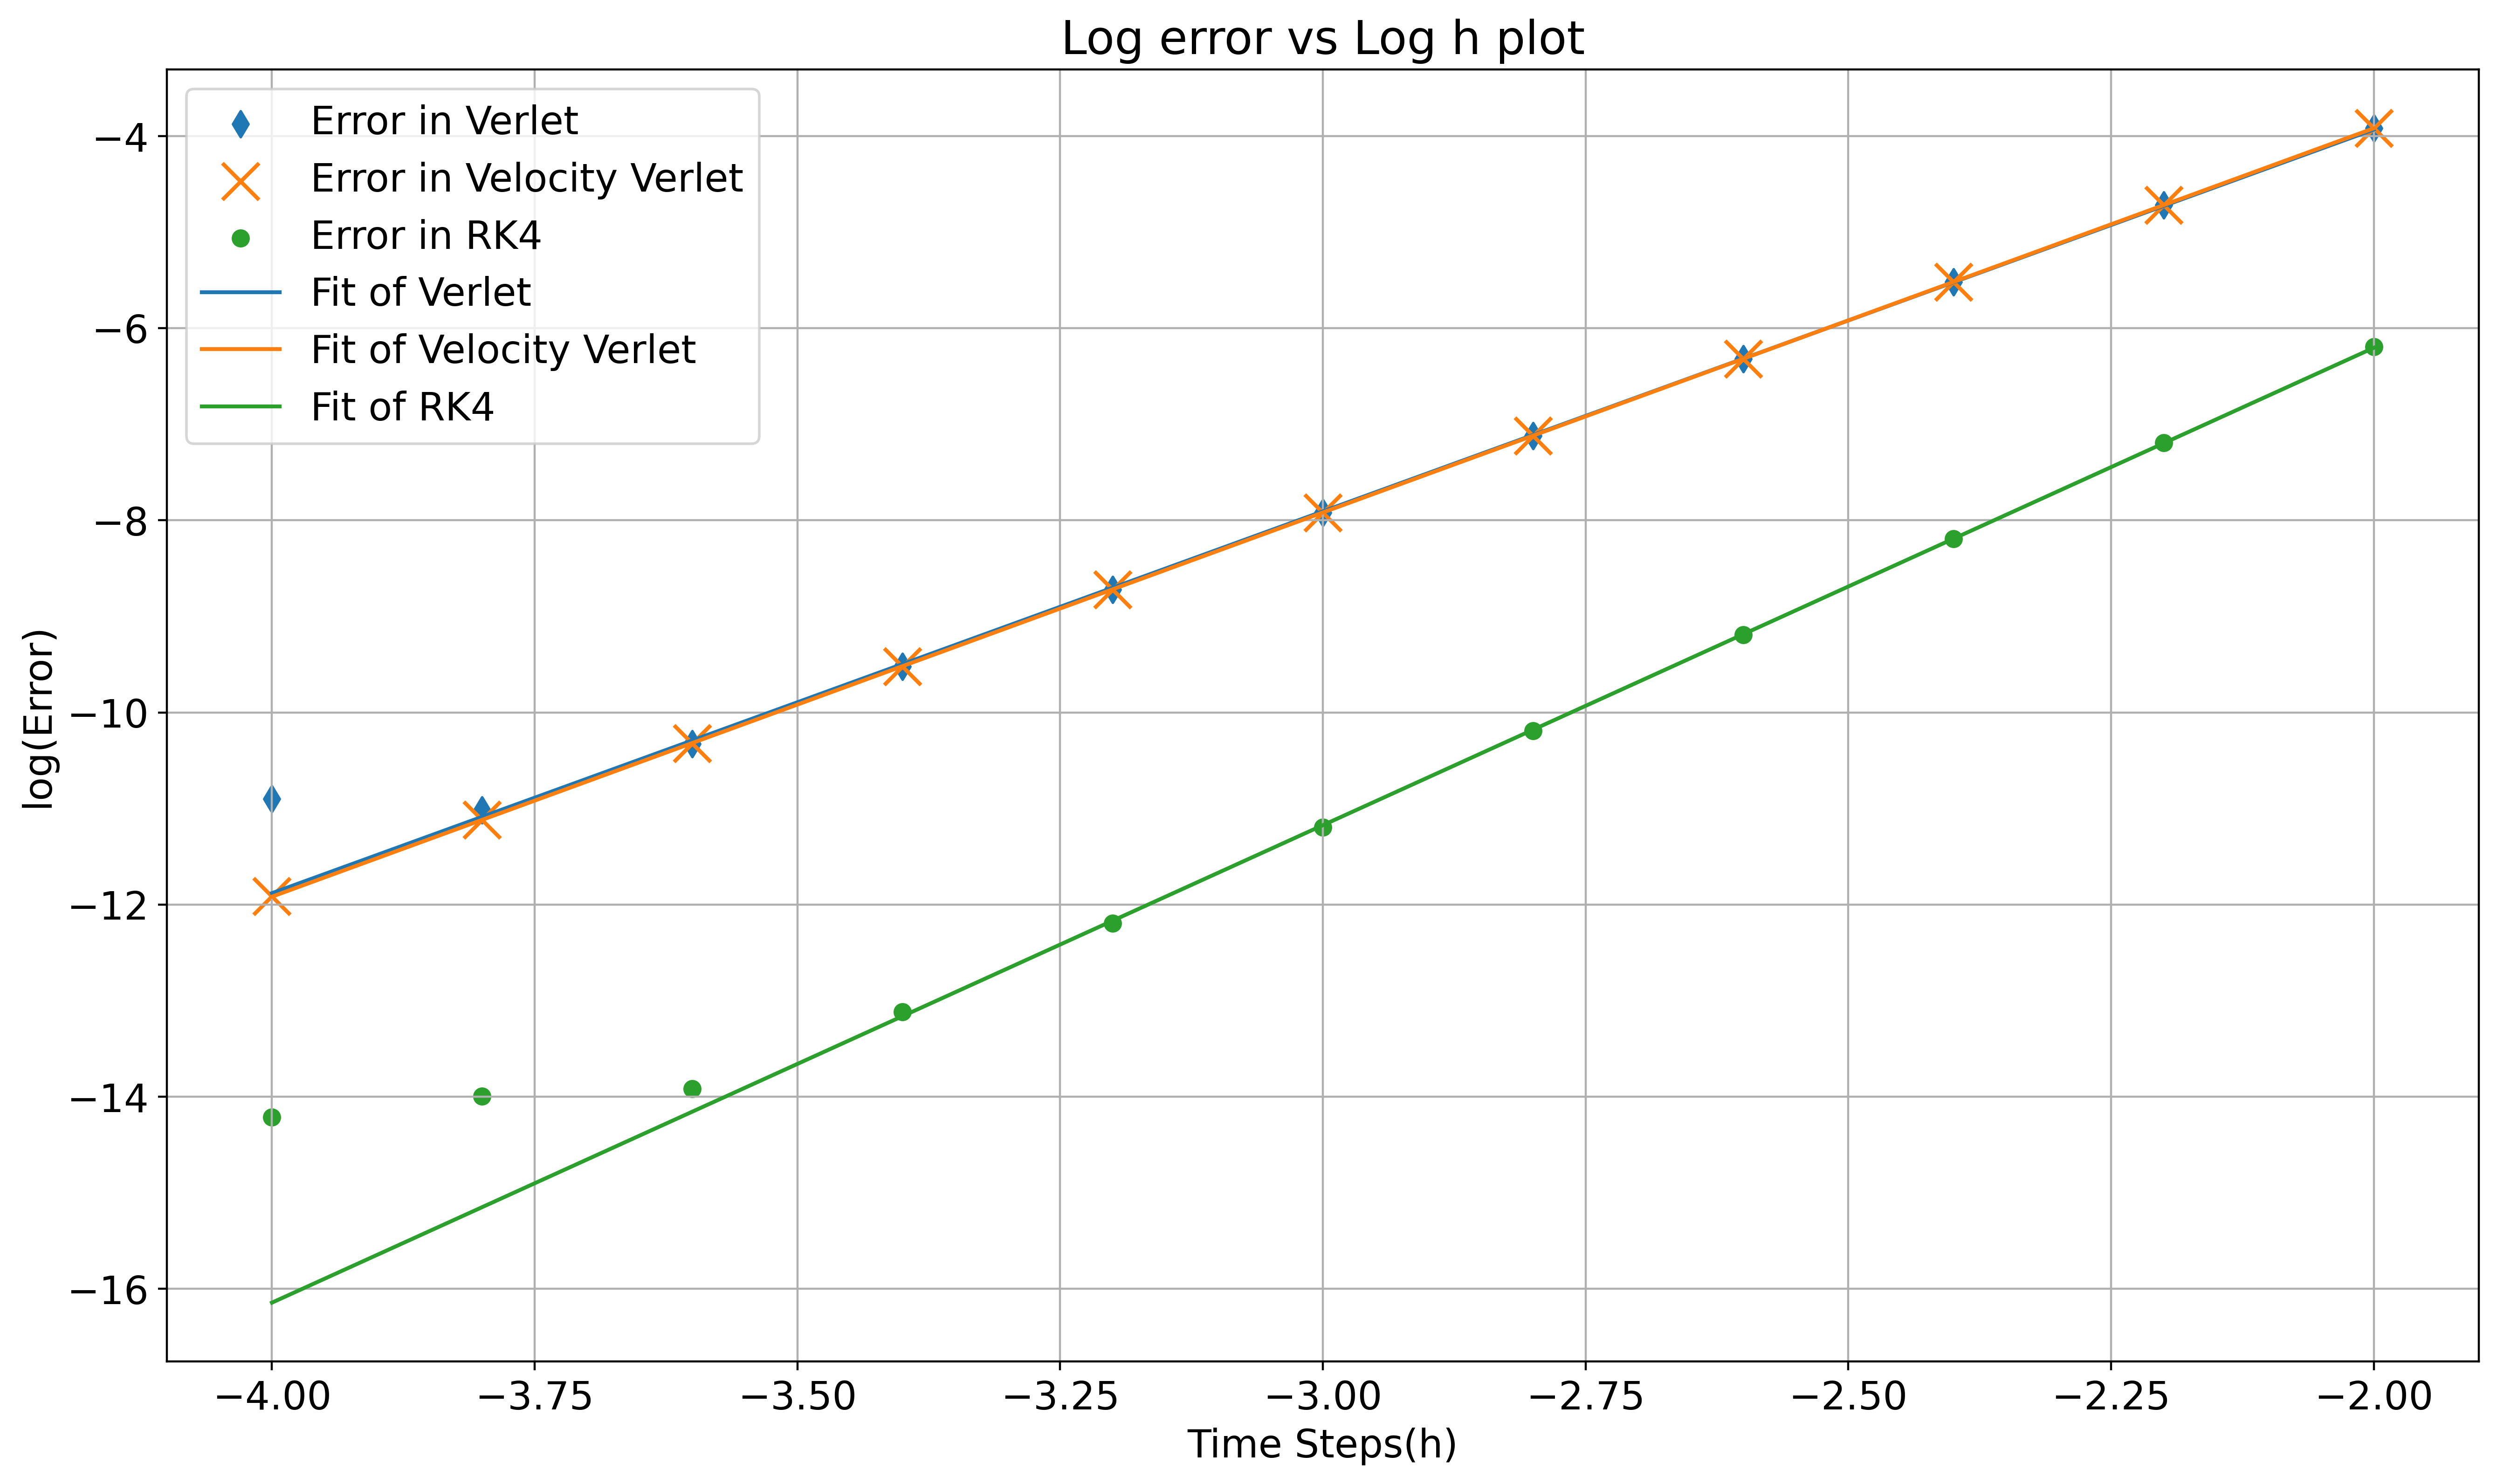

In [12]:
plt.figure(figsize=(16,9), dpi = 400)
plt.scatter(np.log10(h), np.log10(y_err_vlt), label = "Error in Verlet", marker = "d", s = 50)
plt.scatter(np.log10(h), np.log10(y_err_vvlt), label = "Error in Velocity Verlet", marker = "x", s=200)

plt.scatter(np.log10(h), np.log10(y_err_rk4), label = "Error in RK4")

plt.plot(errx, yvfit, label = "Fit of Verlet")
plt.plot(errx, yvvfit, label= "Fit of Velocity Verlet")
plt.plot(errx, yrk4fit, label = "Fit of RK4")

plt.legend()
plt.grid()
plt.xlabel("Time Steps(h)")
plt.ylabel("log(Error)")
plt.title("Log error vs Log h plot");

# Question 2

A projectile of mass $m = 2$ kg is thrown with a speed of $10 ms^{−1}$ at an angle $60^\circ$
w.r.t. the horizontal plane. The acceleration due to gravity is $9.8 ms^2$. The mass experiences a
velocity-dependent drag force with coefficients $\gamma = 2 kg.s^{−1}$.

So our equations come out to be
$$ m\frac{d^2x(t)}{dt^2} + \gamma\frac{dx(t)}{dt} = 0$$
$$ m\frac{d^2y(t)}{dt^2} + \gamma\frac{dy(t)}{dt} +g= 0$$

So we decouple our equations into vector form,
$$m \frac{d}{dt} \begin{pmatrix}x \\ y \end{pmatrix} = \begin{pmatrix}v_x \\ v_y \end{pmatrix}$$
$$m \frac{d}{dt} \begin{pmatrix}v_x \\ v_y \end{pmatrix} = \begin{pmatrix} -\frac{\gamma}{m}v_x \\ -g -\frac{\gamma}{m} v_y \end{pmatrix}$$

Using this we can solve our equations as before.

**Note**: For using Velocity verlet, the $a_{n+1}$ explicitly depends on $v_{n+1}$ and vice versa. To solve this we need to implement a root finding method. Or, if we go the analytical route, we can assume one of the two exist and then explicitly solve for both.

In [13]:
GAMMA = 2# drag coefficient
M = 2# mass
g = 9.8# acceleration due to gravity
def f3(t,yv):
    yv = np.asarray(yv)
    Y = np.array([yv[2],yv[3],-(GAMMA/M)*yv[2],-g - (GAMMA/M)*yv[3]])
    return  Y

def modvel_vlt(yn, vn, x, h , f):
    a = np.array([0,g])
    ynp1 = yn + vn*h + 0.5*f(x, yn)*(h**2)
    vnp1 = (vn*(1-(GAMMA*h)/(2*M)) - h*a)/(1+(GAMMA*h)/(2*M))
    return ynp1, vnp1


In [14]:
x0 = 0 # t_initial 
xf = 5# t final
h = 0.01# step size
N = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y_ini2 = np.asarray([0.0, 0.0,5.0, 5*np.sqrt(3)])  # Initial condition


In [15]:
GAMMA = 3
prk4 = call(rk4,x0,xf,N,y_ini2, f=f3)
peu = call(euler,x0,xf,N,y_ini2, f=f3)


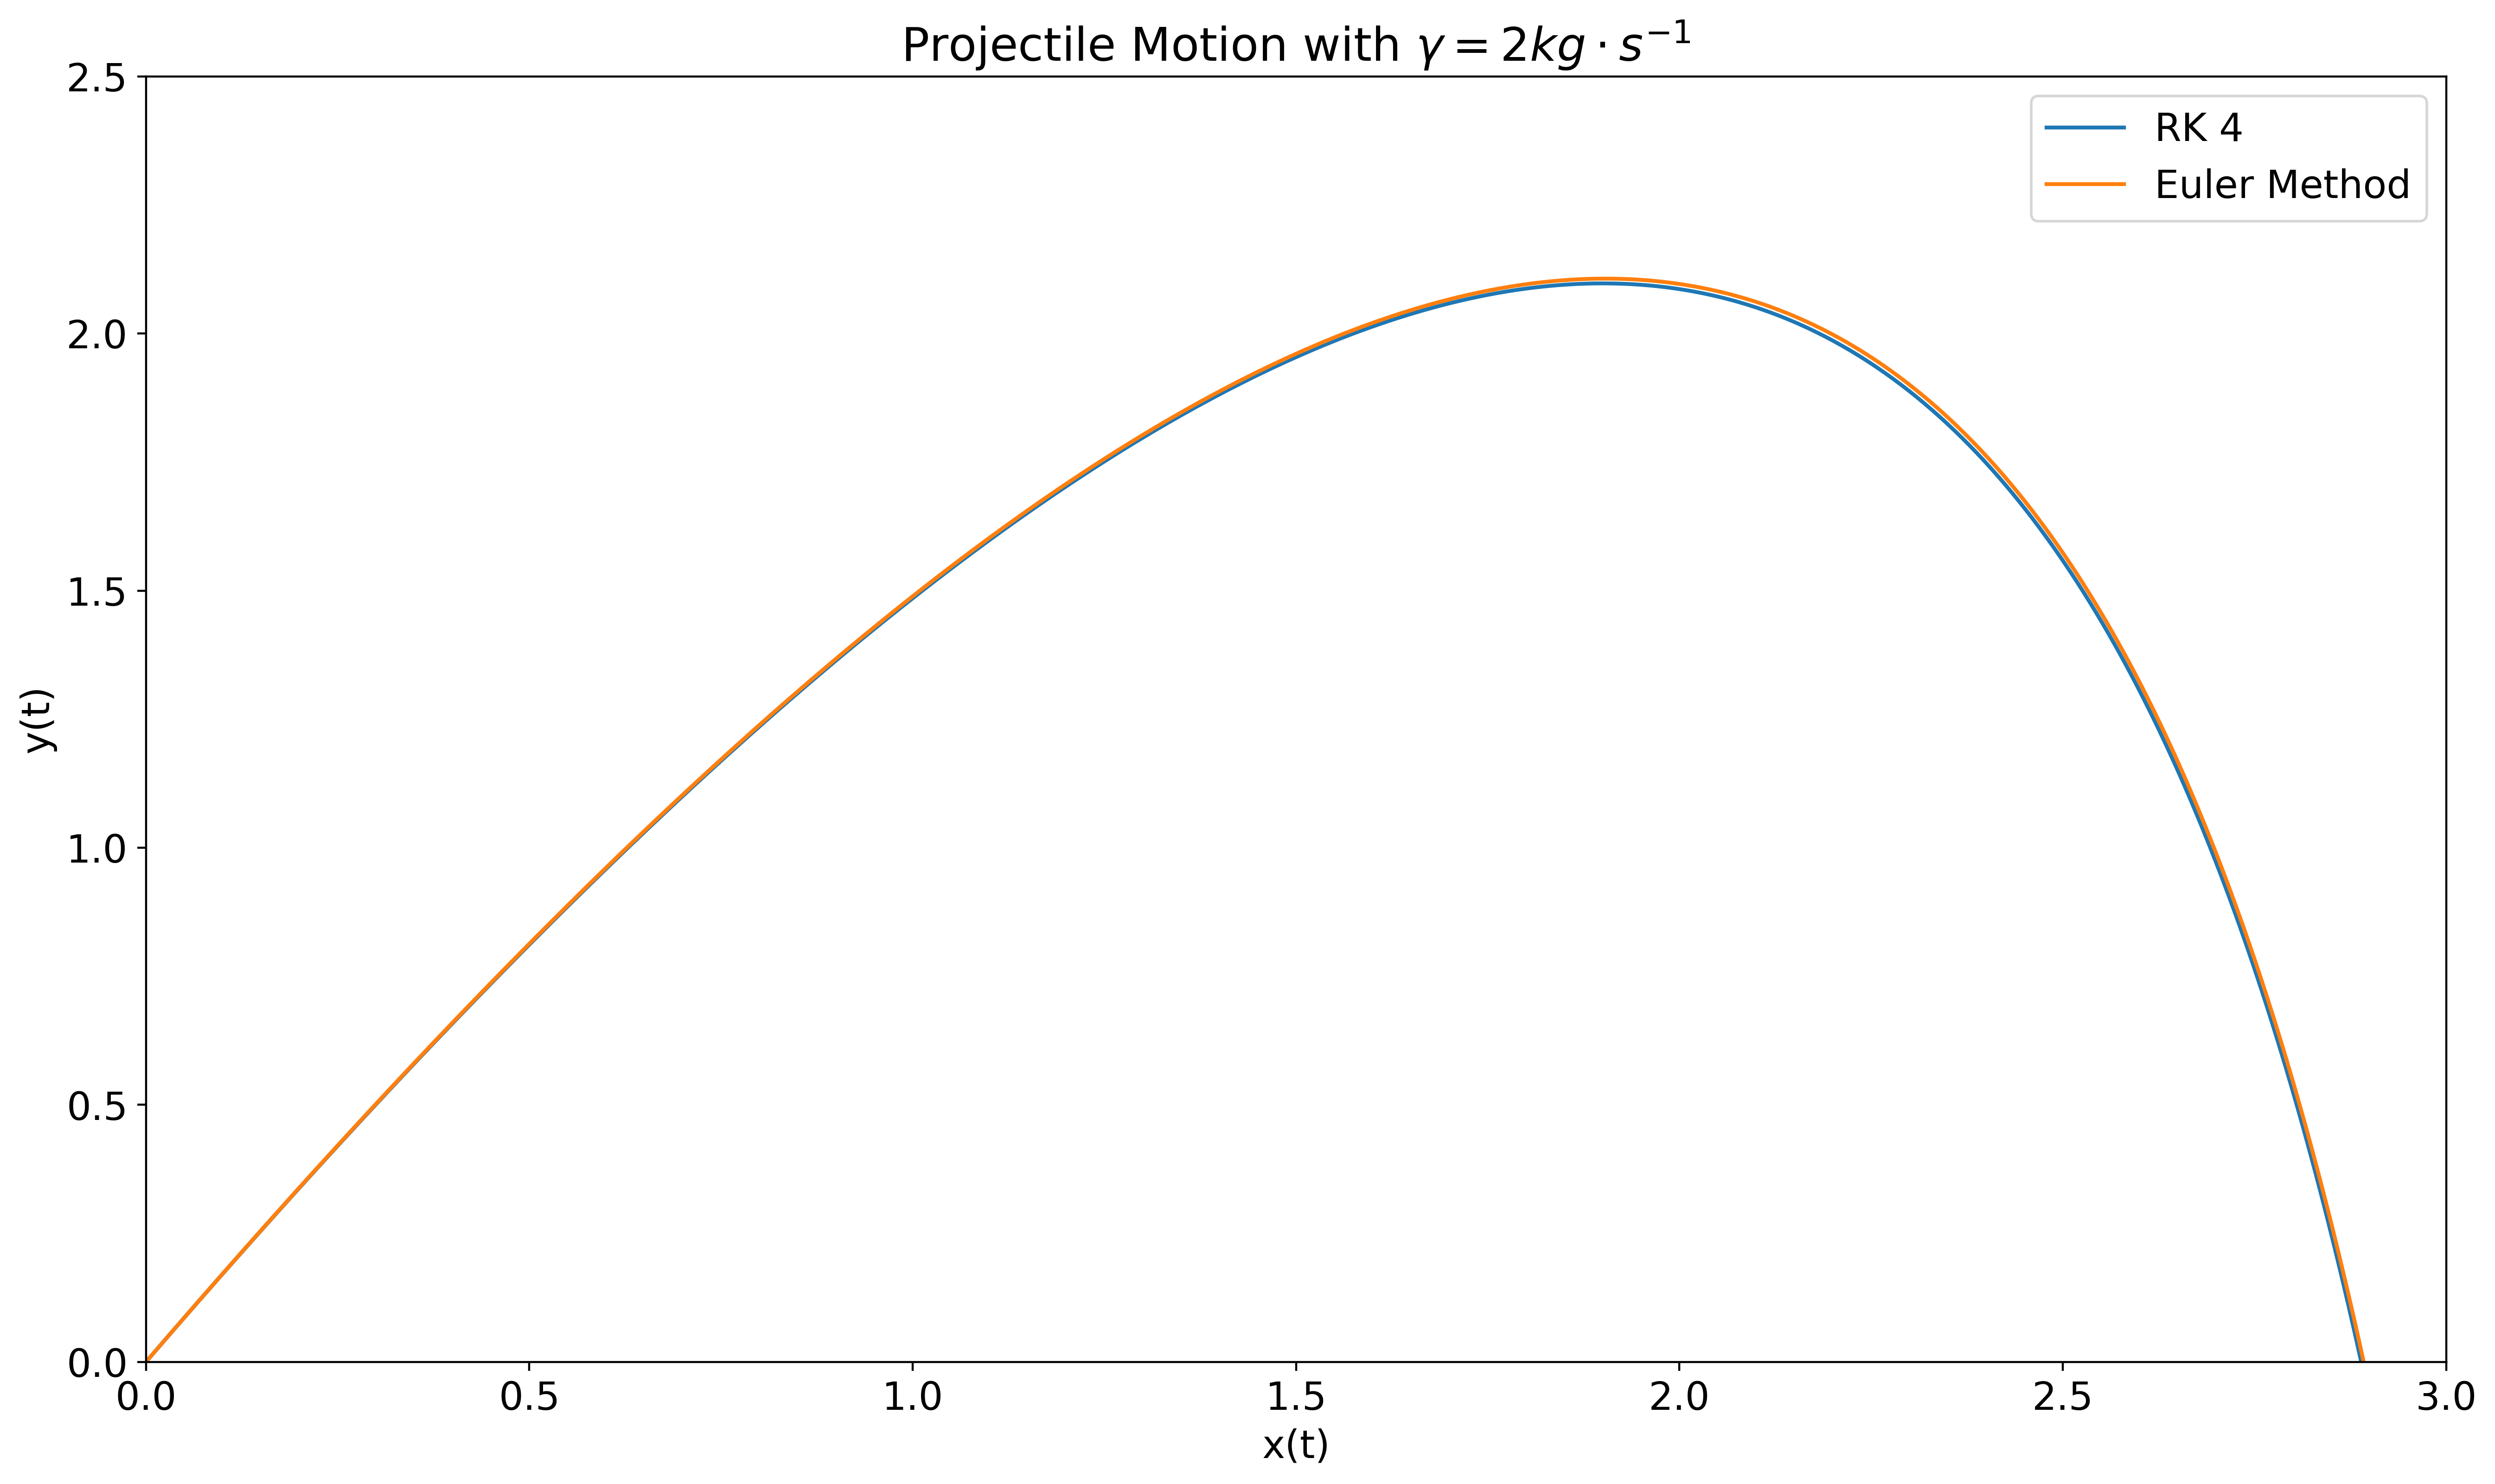

In [16]:
plt.figure(figsize=(16,9), dpi = 400)

plt.plot(prk4[:,0], prk4[:,1], label = "RK 4")
plt.plot(peu[:,0], peu[:,1],label = "Euler Method")
plt.legend()
plt.xlim(0,3)
plt.ylim(top=2.5)
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title(r"Projectile Motion with $\gamma = 2 kg \cdot s^{-1}$")
plt.ylim(bottom=0);


In [17]:
PRK_range_X = []
PRK_range_Y = []
PEU_range_X = []
PEU_range_Y = []
for i in range(0 , 11):
    GAMMA = i
    prk4 = call(rk4,x0,xf,N,y_ini2, f=f3)
    peu = call(euler,x0,xf,N,y_ini2, f=f3)
    PEU_range_X.append(peu[:,0])    
    PEU_range_Y.append(peu[:,1])
    PRK_range_X.append(prk4[:,0])    
    PRK_range_Y.append(prk4[:,1])

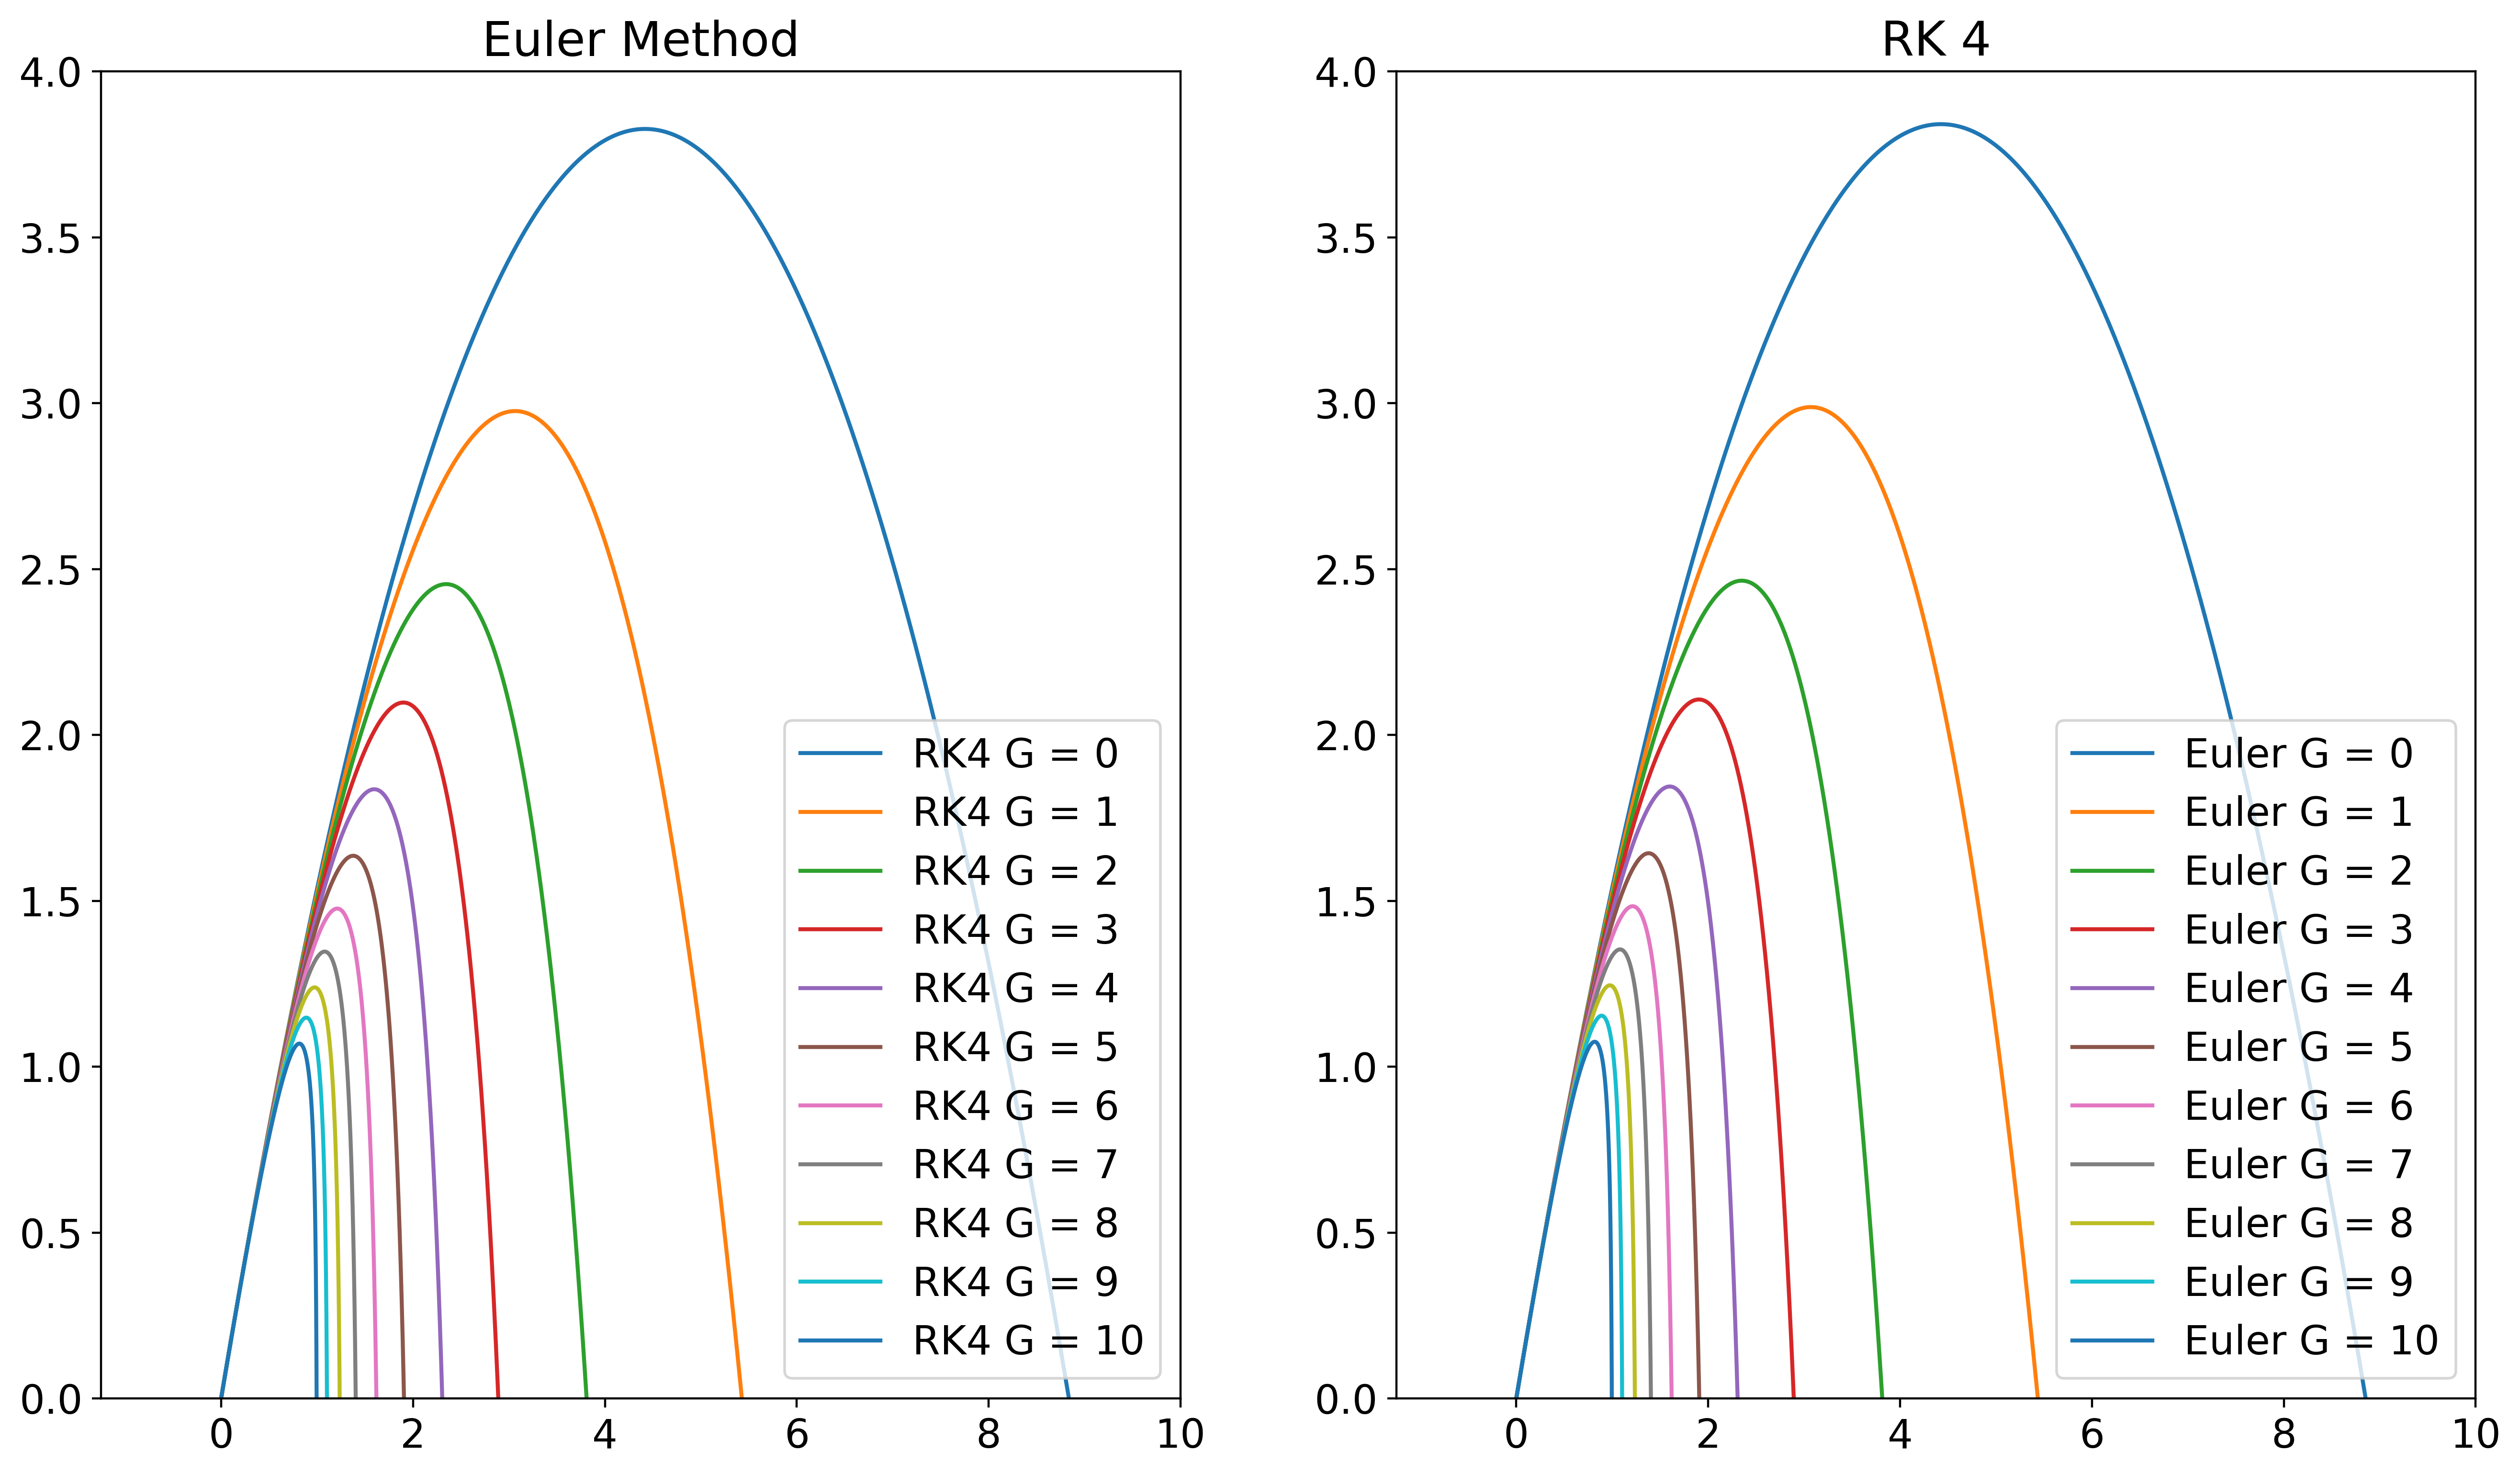

In [18]:
fig, axes = plt.subplots(1,2,figsize=(16,9), dpi = 400)


for i in range(11):
    axes[0].plot(PRK_range_X[i], PRK_range_Y[i], label = f"RK4 G = {i:d}")
    axes[1].plot(PEU_range_X[i], PEU_range_Y[i], label = f"Euler G = {i:d}")
axes[0].set_ylim(top=4, bottom =0)
axes[1].set_ylim(top=4, bottom =0)
axes[0].set_xlim(right = 10)
axes[1].set_xlim(right = 10)
axes[1].set_title("Euler Method")
axes[0].set_title("RK 4")
axes[0].legend()
axes[1].legend();